# Support Vector Machine (SVM) Theory

## Introduction

Support Vector Machines (SVMs) are powerful supervised learning algorithms used for both classification and regression tasks. SVMs are particularly effective in high-dimensional spaces and are versatile due to their ability to use different kernel functions.

## Mathematical Foundation

### Linear SVM for Classification

For a linearly separable dataset, SVM finds the optimal hyperplane that maximizes the margin between classes. The decision boundary is defined by:

$$f(x) = w^T x + b$$

Where:
- $w$ is the weight vector
- $b$ is the bias term
- The classification decision is made based on the sign of $f(x)$

### Optimization Problem

The SVM optimization problem aims to maximize the margin while minimizing classification errors:

**Primal Problem:**
$$\min_{w,b,\xi} \frac{1}{2}||w||^2 + C\sum_{i=1}^{n}\xi_i$$

Subject to:
- $y_i(w^T x_i + b) \geq 1 - \xi_i$
- $\xi_i \geq 0$

Where:
- $w$ is the weight vector.
- $b$ is the bias term.
- $y_i$ is the class label of the data point $x_i$.
- $\xi_i$ are slack variables allowing for misclassification.
- $C$ is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.

### Dual Problem

The dual formulation is often easier to solve and allows for the kernel trick:

$$\max_{\alpha} \sum_{i=1}^{n}\alpha_i - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_j y_i y_j x_i^T x_j$$

Subject to:
- $0 \leq \alpha_i \leq C$
- $\sum_{i=1}^{n}\alpha_i y_i = 0$

Where $\alpha_i$ are the Lagrange multipliers (dual variables).

### Support Vectors

Support vectors are the data points that lie closest to the decision boundary. They are the points for which $\alpha_i > 0$. The final decision function depends only on these support vectors:

$$f(x) = \sum_{i \in SV} \alpha_i y_i x_i^T x + b$$

where $SV$ denotes the set of support vector indices.

## Kernel Functions

Kernels allow SVMs to operate in high-dimensional feature spaces without explicitly computing the coordinates in that space. This is known as the "kernel trick".

### Common Kernel Functions

1. **Linear Kernel:**
   $$K(x_i, x_j) = x_i^T x_j$$

2. **Polynomial Kernel:**
   $$K(x_i, x_j) = (\gamma x_i^T x_j + r)^d$$
   
3. **Radial Basis Function (RBF) Kernel:**
   $$K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$$
   
4. **Sigmoid Kernel:**
   $$K(x_i, x_j) = \tanh(\gamma x_i^T x_j + r)$$

Where:
- $\gamma$ controls the influence of each training example
- $r$ is an independent term
- $d$ is the degree of the polynomial

## SVM for Regression (SVR)

SVM can also be used for regression tasks. The goal is to find a function that has at most $\epsilon$ deviation from the actual targets.

### $\epsilon$-SVR Formulation

$$\min_{w,b,\xi,\xi^*} \frac{1}{2}||w||^2 + C\sum_{i=1}^{n}(\xi_i + \xi_i^*)$$

Subject to:
- $y_i - w^T x_i - b \leq \epsilon + \xi_i$
- $w^T x_i + b - y_i \leq \epsilon + \xi_i^*$
- $\xi_i, \xi_i^* \geq 0$

Where:
- $\epsilon$ defines the $\epsilon$-tube within which no penalty is associated
- $\xi_i$ and $\xi_i^*$ are slack variables for points outside the tube
- $C$ controls the trade-off between model complexity and tolerance to errors

### Decision Function for SVR

$$f(x) = \sum_{i=1}^{n}(\alpha_i - \alpha_i^*)K(x_i, x) + b$$

Where $\alpha_i$ and $\alpha_i^*$ are the dual variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.svm import SVC, SVR
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Visualizing SVM Decision Boundaries

Let's create visualizations to understand how different SVM kernels create decision boundaries.

In [2]:
# Generate a simple 2D dataset for visualization
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, random_state=42)

# Function to plot decision boundary
def plot_svm_decision_boundary(X, y, kernel='linear', title=None):
    """
    Plot SVM decision boundary for different kernels
    """
    # Train SVM
    svm = SVC(kernel=kernel, C=1.0, gamma='scale')
    svm.fit(X, y)
    
    # Create a mesh for plotting
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    
    # Highlight support vectors
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='black', linewidth=2, label='Support Vectors')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM with {kernel.capitalize()} Kernel' if not title else title)
    plt.legend()
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return svm

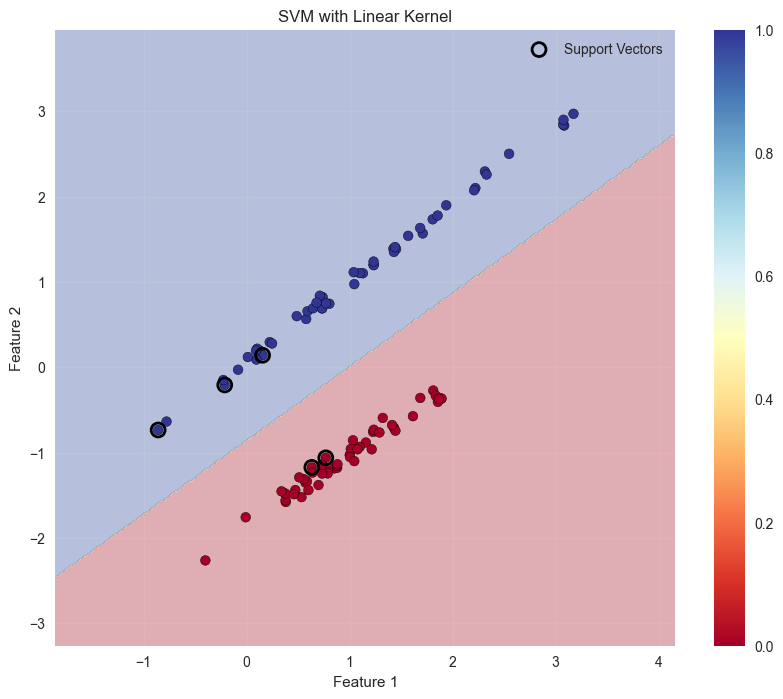


Linear Kernel:
Number of support vectors: 5
Support vector indices: [ 5 30 41 72 82]


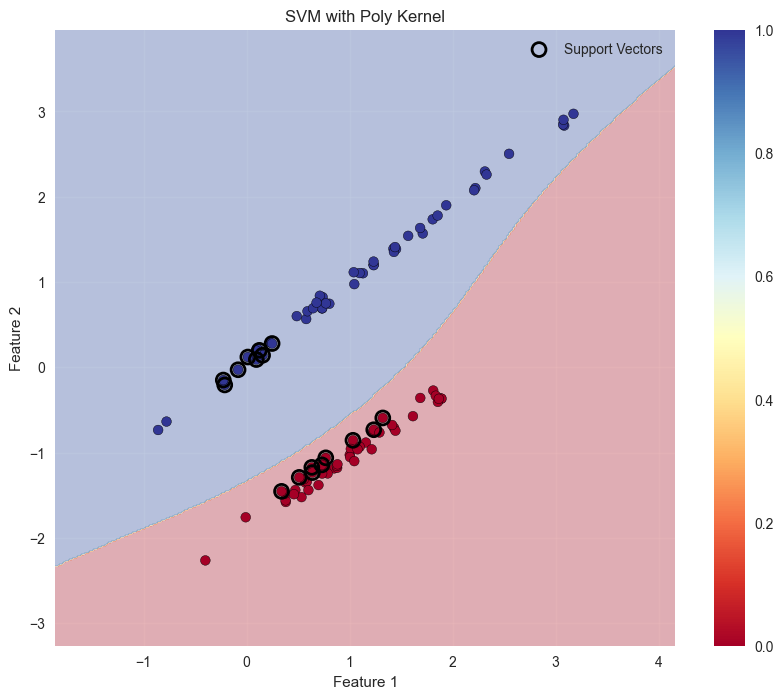


Poly Kernel:
Number of support vectors: 17
Support vector indices: [ 5  8 10 11 16 30 46 86 87  7 41 42 58 72 78 89 90]


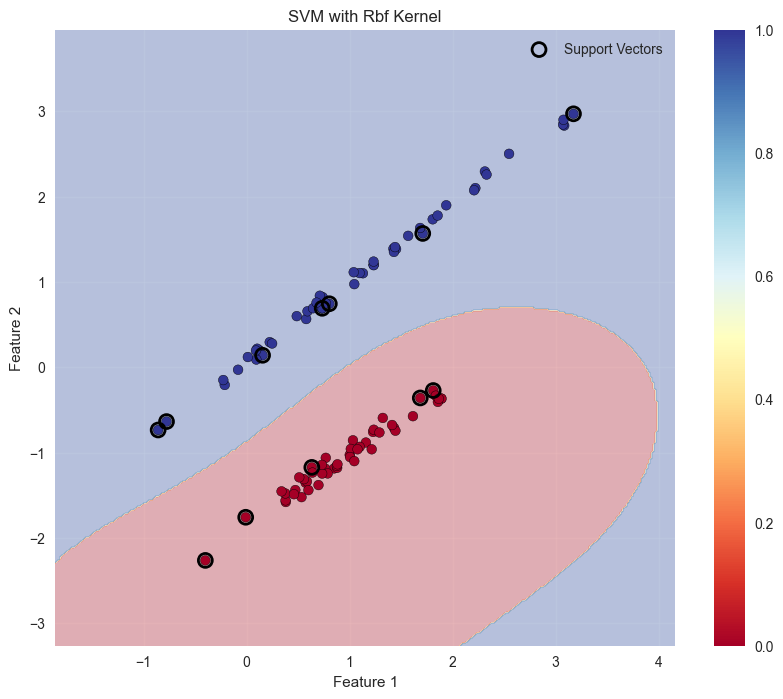


Rbf Kernel:
Number of support vectors: 12
Support vector indices: [ 5 28 59 74 83 19 41 45 57 62 75 82]


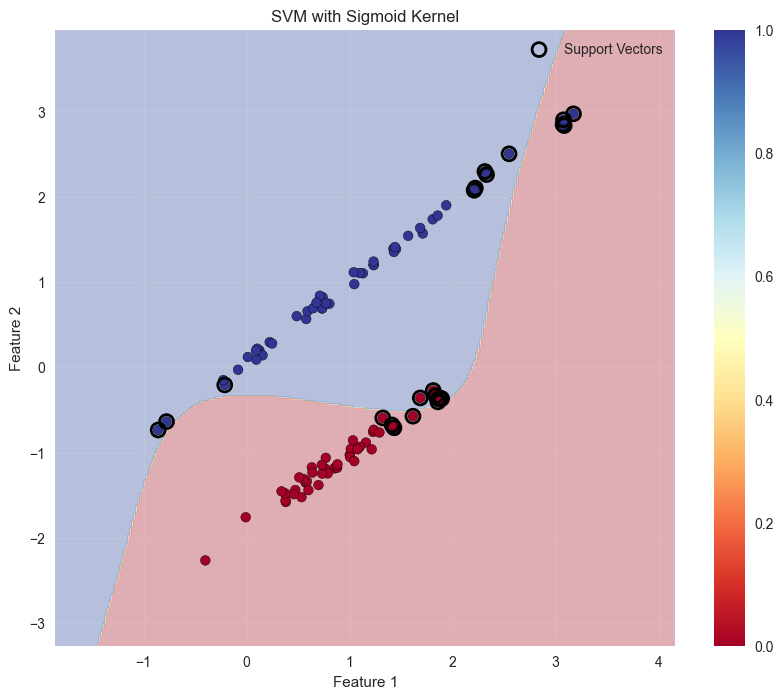


Sigmoid Kernel:
Number of support vectors: 23
Support vector indices: [ 8 22 29 31 39 48 59 68 81 83 92  2 13 14 21 24 32 36 45 65 72 75 82]


In [3]:
# Visualize different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_model = plot_svm_decision_boundary(X, y, kernel=kernel)
    print(f"\n{kernel.capitalize()} Kernel:")
    print(f"Number of support vectors: {len(svm_model.support_vectors_)}")
    print(f"Support vector indices: {svm_model.support_}")

## Margin Visualization

Let's visualize the concept of margin in SVM.

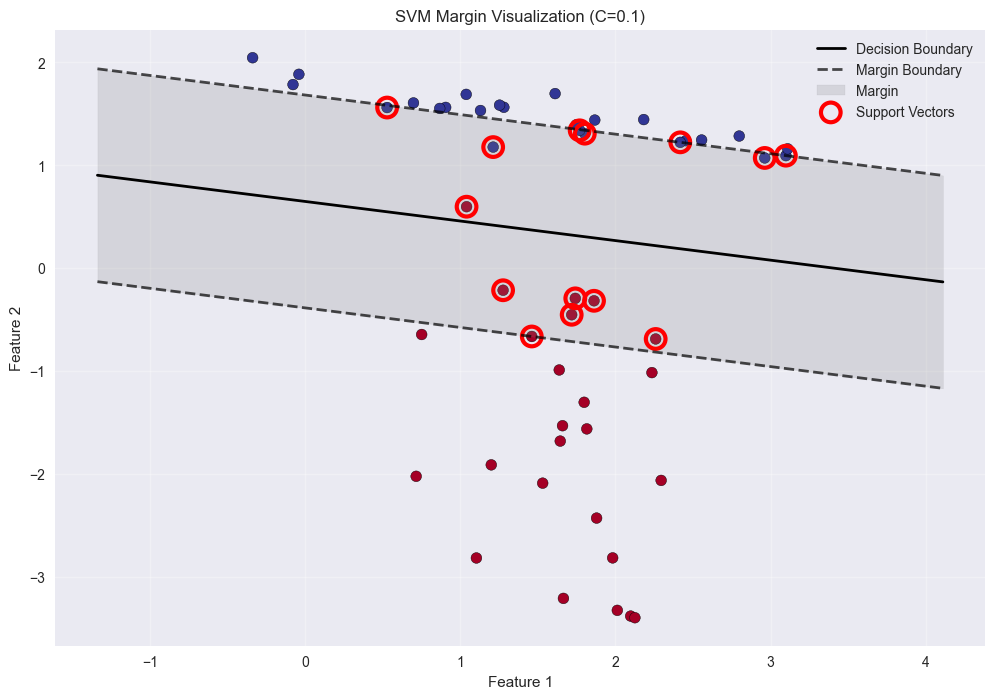

Margin width: 2.0316
Number of support vectors: 14


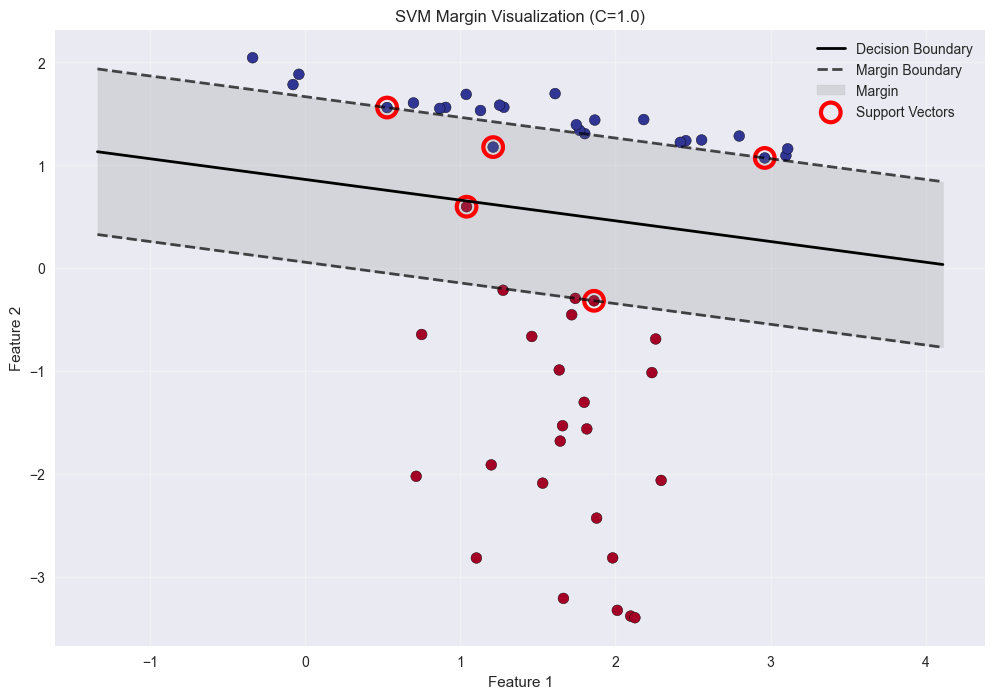

Margin width: 1.5774
Number of support vectors: 5


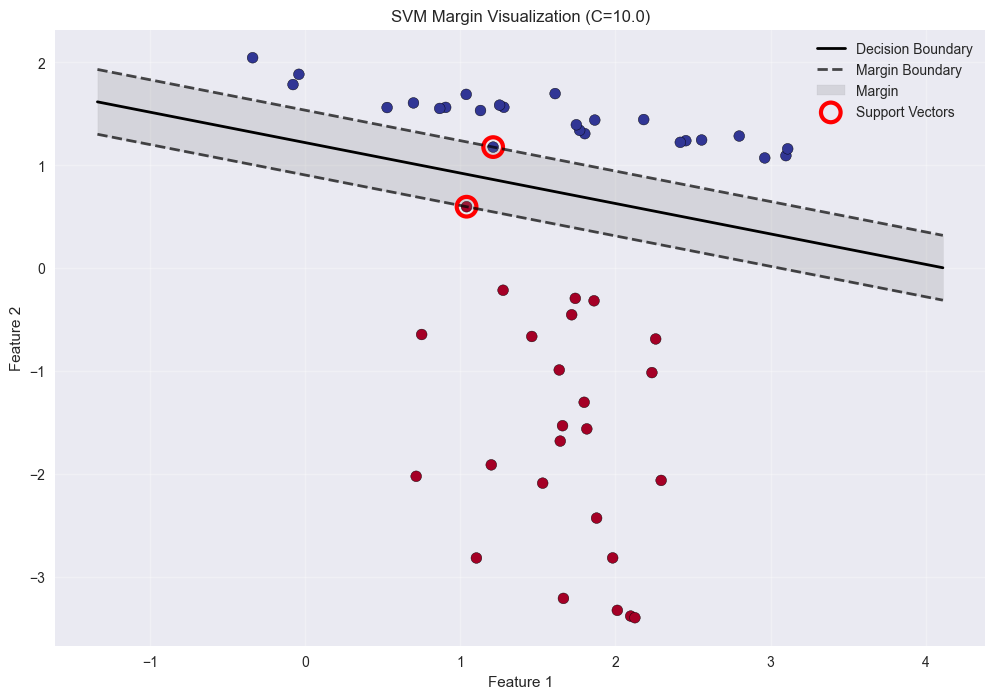

Margin width: 0.6040
Number of support vectors: 2


In [4]:
def plot_svm_margin(X, y, C=1.0):
    """
    Visualize SVM margin and support vectors
    """
    # Train linear SVM
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    
    # Get the separating hyperplane
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
    yy = a * xx - (svm.intercept_[0]) / w[1]
    
    # Plot the parallels to the separating hyperplane that pass through the support vectors
    margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    
    plt.figure(figsize=(12, 8))
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=60, edgecolors='black')
    
    # Plot decision boundary and margins
    plt.plot(xx, yy, 'k-', linewidth=2, label='Decision Boundary')
    plt.plot(xx, yy_down, 'k--', linewidth=2, alpha=0.7, label='Margin Boundary')
    plt.plot(xx, yy_up, 'k--', linewidth=2, alpha=0.7)
    
    # Fill the margin area
    plt.fill_between(xx, yy_down, yy_up, alpha=0.2, color='gray', label='Margin')
    
    # Highlight support vectors
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=200, facecolors='none', edgecolors='red', linewidth=3, label='Support Vectors')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Margin Visualization (C={C})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Margin width: {2 * margin:.4f}")
    print(f"Number of support vectors: {len(svm.support_vectors_)}")
    
    return svm

# Create a linearly separable dataset
np.random.seed(42)
X_linear, y_linear = make_classification(n_samples=50, n_features=2, n_redundant=0, 
                                       n_informative=2, n_clusters_per_class=1, 
                                       class_sep=1.5, random_state=42)

# Visualize with different C values
C_values = [0.1, 1.0, 10.0]
for C in C_values:
    svm_model = plot_svm_margin(X_linear, y_linear, C=C)

## Effect of Regularization Parameter C

The regularization parameter C controls the trade-off between achieving a low training error and a low testing error.

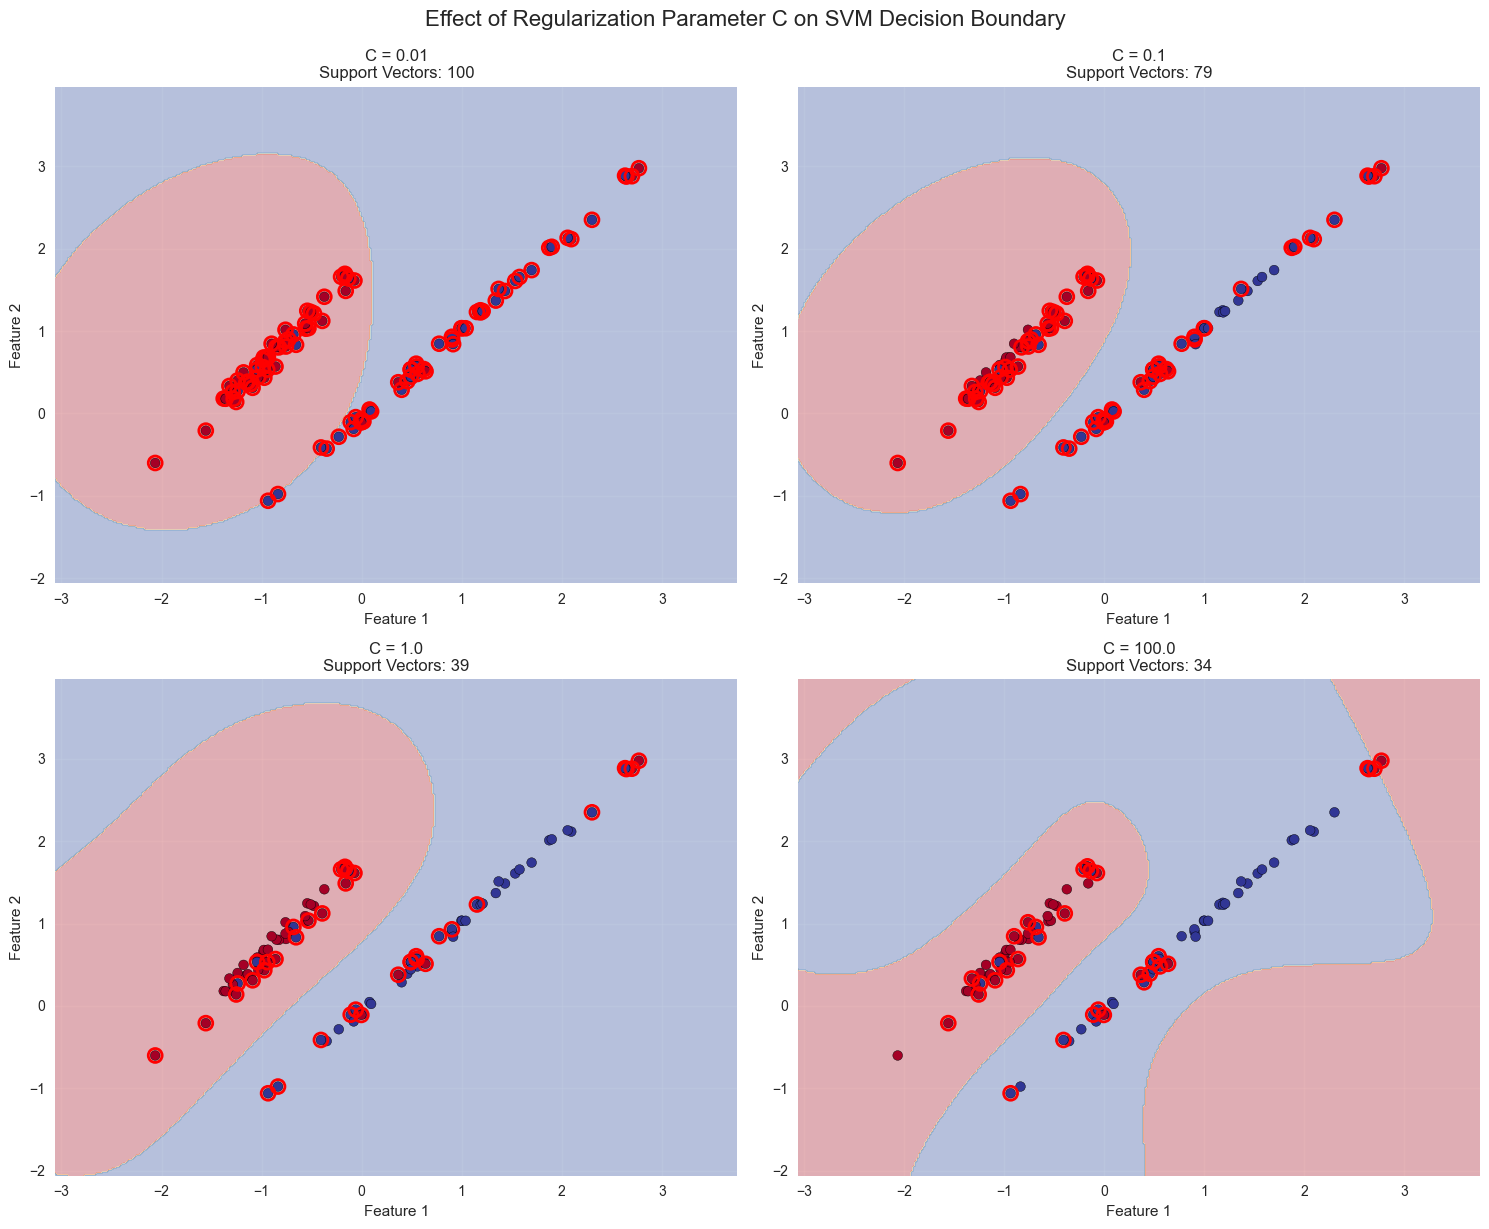

In [5]:
# Generate noisy data to show the effect of C
np.random.seed(42)
X_noisy, y_noisy = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                                     n_informative=2, n_clusters_per_class=1, 
                                     class_sep=0.8, flip_y=0.1, random_state=42)

# Plot with different C values
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

C_values = [0.01, 0.1, 1.0, 100.0]

for i, C in enumerate(C_values):
    # Train SVM
    svm = SVC(kernel='rbf', C=C, gamma='scale')
    svm.fit(X_noisy, y_noisy)
    
    # Create mesh for plotting
    h = 0.02
    x_min, x_max = X_noisy[:, 0].min() - 1, X_noisy[:, 0].max() + 1
    y_min, y_max = X_noisy[:, 1].min() - 1, X_noisy[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    axes[i].scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, cmap=plt.cm.RdYlBu, edgecolors='black')
    axes[i].scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                   s=100, facecolors='none', edgecolors='red', linewidth=2)
    
    axes[i].set_title(f'C = {C}\nSupport Vectors: {len(svm.support_vectors_)}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Effect of Regularization Parameter C on SVM Decision Boundary', y=1.02, fontsize=16)
plt.show()

## Gamma Parameter in RBF Kernel

The gamma parameter defines how far the influence of a single training example reaches.

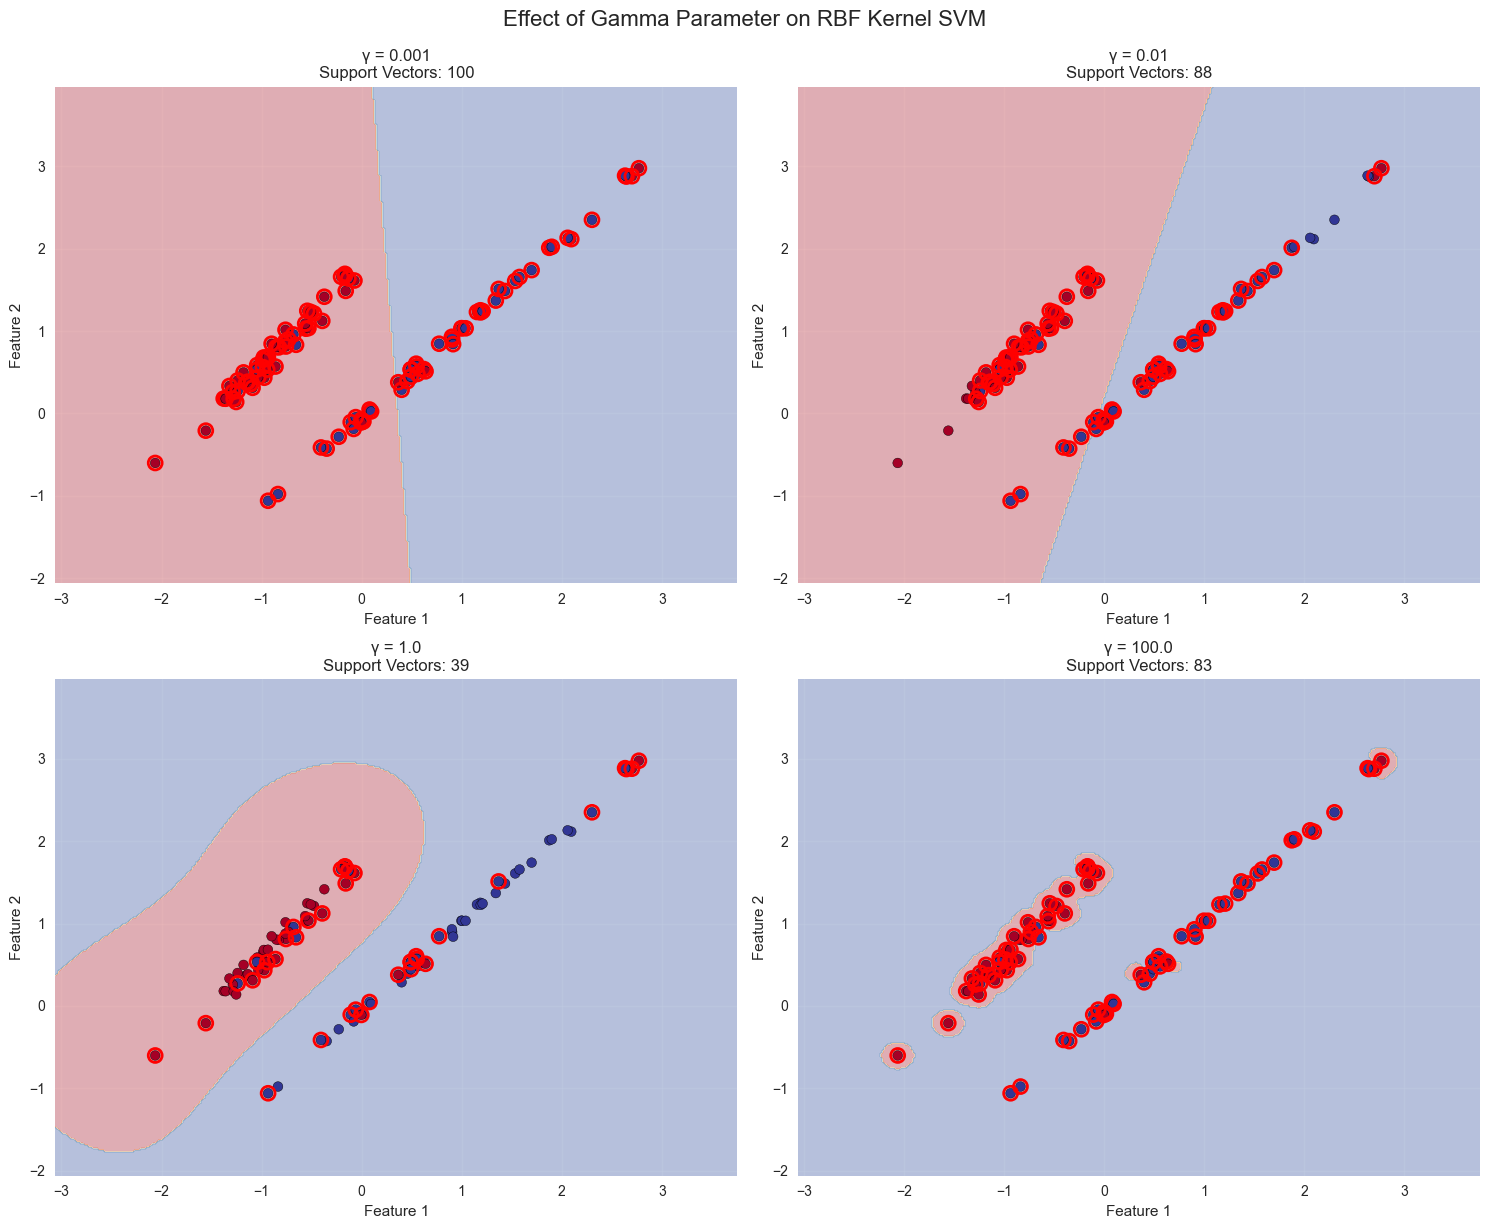

In [6]:
# Plot with different gamma values
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

gamma_values = [0.001, 0.01, 1.0, 100.0]

for i, gamma in enumerate(gamma_values):
    # Train SVM
    svm = SVC(kernel='rbf', C=1.0, gamma=gamma)
    svm.fit(X_noisy, y_noisy)
    
    # Create mesh for plotting
    h = 0.02
    x_min, x_max = X_noisy[:, 0].min() - 1, X_noisy[:, 0].max() + 1
    y_min, y_max = X_noisy[:, 1].min() - 1, X_noisy[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    axes[i].scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, cmap=plt.cm.RdYlBu, edgecolors='black')
    axes[i].scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                   s=100, facecolors='none', edgecolors='red', linewidth=2)
    
    axes[i].set_title(f'γ = {gamma}\nSupport Vectors: {len(svm.support_vectors_)}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Effect of Gamma Parameter on RBF Kernel SVM', y=1.02, fontsize=16)
plt.show()

## Key Takeaways

1. **Support Vectors**: Only a subset of training data (support vectors) determines the decision boundary
2. **Margin Maximization**: SVM finds the hyperplane that maximizes the margin between classes
3. **Kernel Trick**: Allows SVM to handle non-linear relationships by mapping to higher dimensions
4. **Regularization (C)**: 
   - Low C: Larger margin, may allow misclassifications (underfitting)
   - High C: Smaller margin, tries to classify all points correctly (overfitting)
5. **Gamma (RBF kernel)**:
   - Low gamma: Smooth decision boundary (underfitting)
   - High gamma: Complex decision boundary (overfitting)

## Next Steps

In the next notebook, we'll implement SVM from scratch to better understand the underlying mathematics and optimization process.

## Kernel Theory for Non-Linear Medical Patterns

### The Kernel Trick for Complex Medical Relationships

Real medical data often exhibits non-linear patterns. For example:
- **Age-Cholesterol interaction**: Risk may not be simply additive
- **Blood pressure thresholds**: Non-linear risk increases
- **Symptom combinations**: Complex interactions between features

The kernel trick allows SVM to capture these patterns without explicitly computing high-dimensional features.

### Mathematical Foundation of Kernels

A kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$ implicitly computes the dot product in a higher-dimensional space:

$$K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$$

Where $\phi(\mathbf{x})$ maps input features to a higher-dimensional space.

### Common Kernels for Medical Data

#### 1. Linear Kernel (Baseline)
$$K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$$

**Medical Use Case:**
- Simple, interpretable relationships
- When features have clear linear impact on diagnosis
- Baseline model for comparison

#### 2. Radial Basis Function (RBF) Kernel
$$K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2\right)$$

**Medical Use Case:**
- Captures smooth, non-linear relationships
- Good for continuous medical measurements (BP, cholesterol, age)
- $\gamma$ controls the "influence radius" of each patient
- **High $\gamma$**: Local patterns (individual patient focus)
- **Low $\gamma$**: Global patterns (population-wide trends)

#### 3. Polynomial Kernel
$$K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^T \mathbf{x}_j + r)^d$$

**Medical Use Case:**
- Captures polynomial interactions between features
- Useful when medical relationships follow polynomial trends
- Degree $d$ controls complexity of interactions

#### 4. Sigmoid Kernel
$$K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\gamma \mathbf{x}_i^T \mathbf{x}_j + r)$$

**Medical Use Case:**
- Mimics neural network behavior
- Good for threshold-based medical decisions
- Can capture sigmoid-shaped dose-response relationships

In [ ]:
# Practical Kernel Selection for Heart Disease Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Set up visualization
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (15, 10)

print("🩺 KERNEL SELECTION FOR MEDICAL DIAGNOSIS")
print("=" * 45)

# Create synthetic medical-like data for demonstration
np.random.seed(42)
n_samples = 200

# Simulate heart disease features
age = np.random.normal(55, 10, n_samples)
chol = np.random.normal(240, 50, n_samples)
bp = np.random.normal(130, 20, n_samples)

# Create non-linear relationships for heart disease
# Higher risk with age + cholesterol interaction
risk_score = (age - 45) * 0.1 + (chol - 200) * 0.02 + (bp - 120) * 0.05
risk_score += 0.001 * age * chol  # Non-linear interaction
risk_score += np.random.normal(0, 2, n_samples)  # Add noise

# Convert to binary classification
y_medical = (risk_score > np.median(risk_score)).astype(int)
X_medical = np.column_stack([age, chol, bp])

# Standardize features (important for SVM)
scaler = StandardScaler()
X_medical_scaled = scaler.fit_transform(X_medical)

print(f"Synthetic Medical Dataset Created:")
print(f"  • {n_samples} patients")
print(f"  • 3 features: Age, Cholesterol, Blood Pressure")
print(f"  • Heart disease rate: {np.mean(y_medical)*100:.1f}%")
print(f"  • Non-linear age-cholesterol interaction included")

# Demonstrate different kernel behaviors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

kernels = [
    ('Linear', 'linear', {}),
    ('RBF (gamma=0.1)', 'rbf', {'gamma': 0.1}),
    ('RBF (gamma=1.0)', 'rbf', {'gamma': 1.0}),
    ('Polynomial (degree=2)', 'poly', {'degree': 2, 'gamma': 'scale'})
]

# Use only first two features for 2D visualization
X_2d = X_medical_scaled[:, :2]
feature_names = ['Age (standardized)', 'Cholesterol (standardized)']

for idx, (title, kernel, params) in enumerate(kernels):
    ax = axes[idx // 2, idx % 2]
    
    # Fit SVM with specific kernel
    svm = SVC(kernel=kernel, C=1.0, **params)
    svm.fit(X_2d, y_medical)
    
    # Create decision boundary
    h = 0.02
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    
    # Plot data points
    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y_medical, 
                        cmap='RdYlBu', edgecolors='black', alpha=0.7)
    
    # Highlight support vectors
    support_vectors = svm.support_vectors_
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], 
              s=100, facecolors='none', edgecolors='red', linewidths=2,
              label=f'Support Vectors ({len(support_vectors)})')
    
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(f'{title}\nAccuracy: {svm.score(X_2d, y_medical):.3f}', 
                fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 Kernel Comparison Analysis:")
print("\n1. **Linear Kernel**: Simple, straight decision boundary")
print("   • Good baseline for medical data")
print("   • Highly interpretable feature weights")
print("   • Fast training and prediction")

print("\n2. **RBF with low gamma (0.1)**: Smooth, curved boundary")
print("   • Captures gentle non-linearities")
print("   • Good generalization")
print("   • Suitable for most medical applications")

print("\n3. **RBF with high gamma (1.0)**: Complex, local boundary")
print("   • Captures fine-grained patterns")
print("   • Risk of overfitting")
print("   • May memorize individual patients")

print("\n4. **Polynomial (degree 2)**: Captures feature interactions")
print("   • Good for known polynomial relationships")
print("   • Can model feature combinations")
print("   • Interpretable up to low degrees")

## Hyperparameter Theory for Medical SVM

### Critical Hyperparameters in Medical Context

#### 1. Regularization Parameter (C)

The parameter $C$ controls the trade-off between margin maximization and training error minimization:

$$\text{Objective} = \underbrace{\frac{1}{2}||\mathbf{w}||^2}_{\text{Margin Maximization}} + \underbrace{C\sum_{i=1}^{n}\xi_i}_{\text{Error Penalty}}$$

**Medical Interpretation:**
- **Low C (C ≈ 0.01)**: 
  - Prioritizes wide margin (conservative diagnosis)
  - May underfit (miss subtle disease patterns)
  - Lower sensitivity, higher specificity
  - **Clinical effect**: May miss early-stage disease

- **High C (C ≈ 100)**:
  - Prioritizes correct classification (aggressive diagnosis)  
  - May overfit (memorize training patients)
  - Higher sensitivity, lower specificity
  - **Clinical effect**: May over-diagnose (false positives)

- **Balanced C (C ≈ 1.0)**:
  - Good balance between margin and accuracy
  - Usually optimal for medical applications

#### 2. RBF Kernel Parameter (γ)

The gamma parameter controls the "influence radius" of each training example:

$$K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2\right)$$

**Medical Interpretation:**
- **Low γ (γ ≈ 0.001)**:
  - Each patient influences a wide area
  - Captures global population trends
  - Smoother decision boundaries
  - Better generalization to new patients

- **High γ (γ ≈ 10)**:
  - Each patient influences only nearby region
  - Captures individual patient variations
  - Complex, wiggly decision boundaries
  - Risk of overfitting to training patients

- **Scale-dependent**: $\gamma = \frac{1}{n_{features} \times \text{var}(X)}$ (sklearn default)

### Mathematical Relationship: C and γ Interaction

The combined effect of C and γ determines model complexity:

| C \ γ | Low γ | High γ |
|-------|-------|--------|
| **Low C** | Underfit | Moderate |
| **High C** | Moderate | Overfit |

### Clinical Performance Metrics

For medical diagnosis, we care about specific metrics:

#### Sensitivity (Recall)
$$\text{Sensitivity} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$
- **Medical meaning**: Ability to correctly identify diseased patients
- **Cost of low sensitivity**: Missing actual heart disease (dangerous)

#### Specificity
$$\text{Specificity} = \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Positives}}$$
- **Medical meaning**: Ability to correctly identify healthy patients
- **Cost of low specificity**: False alarms (anxiety, unnecessary treatment)

#### Precision (Positive Predictive Value)
$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$
- **Medical meaning**: When model predicts disease, how often is it correct?

#### F1-Score (Harmonic Mean)
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
- **Medical meaning**: Balanced measure of diagnostic performance

## Mathematical Derivation: From Optimization to Prediction

### Step 1: Lagrangian Formulation

Starting from the primal problem:
$$\min_{\mathbf{w},b,\boldsymbol{\xi}} \frac{1}{2}||\mathbf{w}||^2 + C\sum_{i=1}^{n}\xi_i$$

The Lagrangian incorporates constraints using multipliers:
$$L(\mathbf{w},b,\boldsymbol{\xi},\boldsymbol{\alpha},\boldsymbol{\mu}) = \frac{1}{2}||\mathbf{w}||^2 + C\sum_{i=1}^{n}\xi_i - \sum_{i=1}^{n}\alpha_i[y_i(\mathbf{w}^T\mathbf{x}_i + b) - 1 + \xi_i] - \sum_{i=1}^{n}\mu_i\xi_i$$

### Step 2: KKT Conditions

Optimality requires:
$$\frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^{n}\alpha_i y_i \mathbf{x}_i = 0 \Rightarrow \mathbf{w} = \sum_{i=1}^{n}\alpha_i y_i \mathbf{x}_i$$

$$\frac{\partial L}{\partial b} = -\sum_{i=1}^{n}\alpha_i y_i = 0 \Rightarrow \sum_{i=1}^{n}\alpha_i y_i = 0$$

$$\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \Rightarrow \alpha_i + \mu_i = C$$

### Step 3: Decision Function Derivation

Substituting the optimal $\mathbf{w}$ into the decision function:
$$f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b = \left(\sum_{i=1}^{n}\alpha_i y_i \mathbf{x}_i\right)^T \mathbf{x} + b$$

$$f(\mathbf{x}) = \sum_{i=1}^{n}\alpha_i y_i \mathbf{x}_i^T \mathbf{x} + b$$

### Step 4: Kernel Extension

Replacing dot products with kernel functions:
$$f(\mathbf{x}) = \sum_{i=1}^{n}\alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b$$

**Medical Interpretation:**
- Only patients with $\alpha_i > 0$ (support vectors) contribute to diagnosis
- $\alpha_i y_i$ weights the "vote" of patient $i$
- $K(\mathbf{x}_i, \mathbf{x})$ measures similarity between new patient and training patient $i$
- Prediction is a weighted vote from similar past patients

### Step 5: Confidence Measure

The magnitude $|f(\mathbf{x})|$ indicates diagnostic confidence:
- **High $|f(\mathbf{x})|$**: Clear diagnosis (far from boundary)
- **Low $|f(\mathbf{x})|$**: Uncertain diagnosis (near boundary)

### Clinical Decision Rule

$$\text{Diagnosis} = \begin{cases}
\text{Heart Disease} & \text{if } f(\mathbf{x}) > 0 \\
\text{Healthy} & \text{if } f(\mathbf{x}) < 0
\end{cases}$$

$$\text{Confidence} = \frac{|f(\mathbf{x})|}{\max_i |f(\mathbf{x}_i)|} \times 100\%$$

In [ ]:
# Mathematical Implementation: Heart Disease SVM Step-by-Step
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print("🧠 MATHEMATICAL SVM IMPLEMENTATION")
print("=" * 40)

# Generate synthetic heart disease data
np.random.seed(42)
n_patients = 100

# Clinical features (simplified)
ages = np.random.normal(55, 12, n_patients)
chol_levels = np.random.normal(240, 40, n_patients)
bp_levels = np.random.normal(130, 15, n_patients)

# Create realistic heart disease labels
# Higher risk with age, cholesterol, and blood pressure
risk_scores = (ages - 40) * 0.05 + (chol_levels - 200) * 0.02 + (bp_levels - 120) * 0.03
risk_scores += np.random.normal(0, 1, n_patients)  # Add noise
labels = (risk_scores > np.median(risk_scores)).astype(int)
labels = 2 * labels - 1  # Convert to {-1, +1} format

# Combine features
X = np.column_stack([ages, chol_levels, bp_levels])
feature_names = ['Age', 'Cholesterol', 'Blood Pressure']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset Created:")
print(f"  • {n_patients} patients")
print(f"  • Features: {feature_names}")
print(f"  • Heart disease prevalence: {np.mean(labels == 1)*100:.1f}%")

# Train SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_scaled, labels)

print(f"\n🎯 SVM Training Results:")
print(f"  • Support vectors: {len(svm.support_)} ({len(svm.support_)/n_patients*100:.1f}% of patients)")
print(f"  • Training accuracy: {svm.score(X_scaled, labels):.3f}")

# Demonstrate mathematical components
print(f"\n🧠 Mathematical Analysis:")

# 1. Support vectors (critical patients)
support_indices = svm.support_
print(f"\n1. Support Vectors (Critical Patients):")
print(f"   Patient indices: {support_indices[:10]}...")
print(f"   These {len(support_indices)} patients define the decision boundary")

# 2. Dual coefficients (alpha * y)
dual_coef = svm.dual_coef_[0]  # alpha_i * y_i for support vectors
print(f"\n2. Dual Coefficients (α_i * y_i):")
print(f"   Range: [{dual_coef.min():.3f}, {dual_coef.max():.3f}]")
print(f"   These weight the 'votes' of support vector patients")

# 3. Decision function calculation
def manual_decision_function(X_new):
    """Manually compute f(x) = sum(alpha_i * y_i * K(x_i, x)) + b"""
    X_new_scaled = scaler.transform(X_new.reshape(1, -1))
    
    # Get support vectors
    support_vectors = svm.support_vectors_
    
    # Compute RBF kernel manually
    gamma = svm.gamma_
    kernel_values = np.exp(-gamma * np.sum((support_vectors - X_new_scaled)**2, axis=1))
    
    # Compute decision function
    decision_value = np.sum(dual_coef * kernel_values) + svm.intercept_[0]
    return decision_value

# Test on a new patient
new_patient = np.array([65, 280, 150])  # Age=65, Chol=280, BP=150
manual_result = manual_decision_function(new_patient)
sklearn_result = svm.decision_function(scaler.transform(new_patient.reshape(1, -1)))[0]

print(f"\n3. Decision Function Example:")
print(f"   New patient: Age={new_patient[0]}, Chol={new_patient[1]}, BP={new_patient[2]}")
print(f"   Manual calculation: f(x) = {manual_result:.3f}")
print(f"   Sklearn calculation: f(x) = {sklearn_result:.3f}")
print(f"   Diagnosis: {'Heart Disease' if manual_result > 0 else 'Healthy'}")
print(f"   Confidence: {abs(manual_result):.3f} (distance from boundary)")

# 4. Feature importance approximation
print(f"\n4. Support Vector Analysis:")
sv_features = X_scaled[support_indices]
sv_labels = labels[support_indices]

# Average support vector by class
healthy_sv = sv_features[sv_labels == -1].mean(axis=0)
disease_sv = sv_features[sv_labels == 1].mean(axis=0)
feature_diff = disease_sv - healthy_sv

print(f"   Average support vector features:")
for i, feature in enumerate(feature_names):
    print(f"   {feature}: Healthy={healthy_sv[i]:.2f}, Disease={disease_sv[i]:.2f}, Diff={feature_diff[i]:.2f}")

print(f"\n🎯 Mathematical Insights:")
print(f"  • Decision boundary separates healthy from diseased patients")
print(f"  • Support vectors are the most 'informative' patients")
print(f"  • Distance from boundary indicates diagnostic confidence")
print(f"  • RBF kernel captures non-linear relationships between features")
print(f"  • Each new patient is classified based on similarity to support vectors")

## Summary: SVM Theory for Medical Diagnosis

### 🧠 Key Mathematical Concepts

1. **Optimization Objective**: Balance between margin maximization and error minimization
   - Wide margins provide conservative, confident diagnoses
   - Error penalties prevent missing critical cases

2. **Kernel Trick**: Enables non-linear decision boundaries without explicit feature mapping
   - Linear: Simple, interpretable baseline
   - RBF: Smooth non-linearities, most versatile for medical data
   - Polynomial: Captures known feature interactions

3. **Support Vectors**: Most informative patients that define the decision boundary
   - Represent "critical cases" near diagnostic threshold
   - Only these patients influence final predictions

4. **Hyperparameters**: 
   - **C**: Trade-off between margin and training accuracy
   - **γ**: Controls influence radius in RBF kernel
   - Together determine model complexity and generalization

### 🏥 Medical Advantages of SVM

1. **Robust Performance**: Often superior accuracy in medical classification
2. **Confidence Measures**: Distance from boundary indicates diagnostic certainty
3. **Kernel Flexibility**: Can capture complex medical relationships
4. **Outlier Resistance**: Less sensitive to unusual patient cases
5. **Support Vector Interpretation**: Identifies most informative patients

### 📈 Clinical Performance Metrics

For medical diagnosis, focus on:
- **Sensitivity**: Ability to detect disease (minimize false negatives)
- **Specificity**: Ability to identify healthy patients (minimize false positives)
- **Precision**: Diagnostic accuracy when disease is predicted
- **F1-Score**: Balanced measure of overall performance

### 🚀 Next Steps

This theoretical foundation prepares us for:
1. **Implementation**: Building SVM from scratch (Notebook 3)
2. **Classification Analysis**: Applying SVM to heart disease data (Notebook 4)
3. **Regression Analysis**: Using SVR for severity prediction (Notebook 5)
4. **Model Comparison**: Evaluating different SVM variants (Notebook 6)

### 🎯 Key Takeaways for Medical Applications

- SVM provides a principled mathematical framework for medical diagnosis
- The optimization objective aligns with medical goals (accuracy + confidence)
- Kernel selection should match the complexity of medical relationships
- Hyperparameter tuning is crucial for optimal diagnostic performance
- Support vectors represent the most informative patients for diagnosis